<a href="https://colab.research.google.com/github/sumitsontakke/deep_learning/blob/main/CNN/end_to_end/cifar100_training_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TopKCategoricalAccuracy

from sklearn.model_selection import train_test_split

In [23]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Normalize X data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Parameter | Guideline
--- | ---
filters | Start small: 32 → 64 → 128 → (256)*
kernel_size | (3,3) is standard; rarely need bigger
activation | Always use 'relu'
padding | Use 'same' to maintain image size
input_shape | Only for the first Conv layer

```python
Conv2D(filters=32, kernel_size=(3,3), ...)
```

Term | Meaning
--- | ---
filters=32 | 32 different 3×3×input_channels filters are learned
Each filter | Extracts one specific kind of feature (edges, blobs, etc.)
stride | How far the filter slides per move
Output | One 2D feature map per filter, stacked into 3D output

In [9]:
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()

2025-04-22 15:48:28.326478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-22 15:48:28.326875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_split=0.25,
    epochs=30,
    batch_size=64,
    verbose=1
)


Epoch 1/30


2025-04-22 15:48:40.205760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-22 15:48:40.347139: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


586/586 [==============================] - ETA: 0s - loss: 12.0044 - accuracy: 0.0250

2025-04-22 15:49:04.441764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - 27s 35ms/step - loss: 12.0044 - accuracy: 0.0250 - val_loss: 4.5504 - val_accuracy: 0.0500
Epoch 2/30
586/586 [==============================] - 16s 27ms/step - loss: 7.9148 - accuracy: 0.0411 - val_loss: 4.6675 - val_accuracy: 0.0820
Epoch 3/30
586/586 [==============================] - 16s 27ms/step - loss: 7.1392 - accuracy: 0.0475 - val_loss: 5.4164 - val_accuracy: 0.0570
Epoch 4/30
586/586 [==============================] - 16s 28ms/step - loss: 6.8109 - accuracy: 0.0566 - val_loss: 4.6434 - val_accuracy: 0.0866
Epoch 5/30
586/586 [==============================] - 15s 26ms/step - loss: 6.8837 - accuracy: 0.0570 - val_loss: 5.4331 - val_accuracy: 0.0482
Epoch 6/30
586/586 [==============================] - 15s 26ms/step - loss: 6.6350 - accuracy: 0.0636 - val_loss: 4.5248 - val_accuracy: 0.0960
Epoch 7/30
586/586 [==============================] - 16s 27ms/step - loss: 6.6313 - accuracy: 0.0656 - val_loss: 4.8540 - val_accuracy: 0.0911
Ep

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.1736, Test Loss: 5.9640


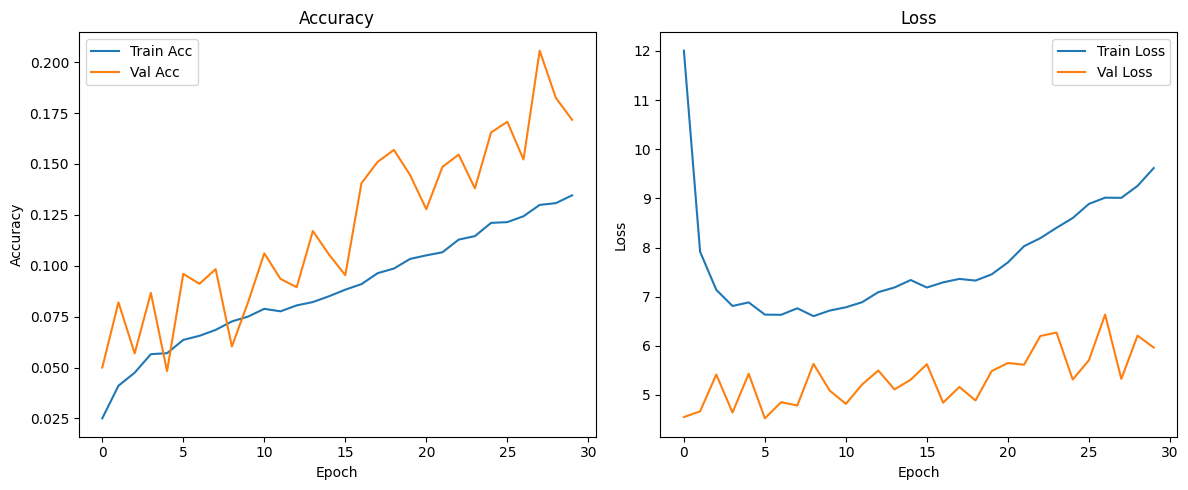

In [12]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix


# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
csr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(csr).transpose()


313/313 [==============================] - 2s 5ms/step


/Users/sumitsontakke/Documents/Dev/PES/DL_Practice/mlos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumitsontakke/Documents/Dev/PES/DL_Practice/mlos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sumitsontakke/Documents/Dev/PES/DL_Practice/mlos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

,precision,recall,f1-score,support
0,0.000000,0.0000,0.000000,100.0000
1,0.357143,0.0500,0.087719,100.0000
2,0.000000,0.0000,0.000000,100.0000
3,0.000000,0.0000,0.000000,100.0000
4,0.200000,0.0600,0.092308,100.0000
...,...,...,...,...
98,0.000000,0.0000,0.000000,100.0000
99,0.000000,0.0000,0.000000,100.0000
accuracy,0.173600,0.1736,0.173600,0.1736
macro avg,0.256447,0.1736,0.145653,10000.0000


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

In [25]:
def get_model_cnn():
    this_model = Sequential([
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return this_model

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

# ModelCheckpoint
checkpoint = ModelCheckpoint(
    "cnn_model.h5",
    monitor="val_loss",
    save_best_only=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_training.shape, y_training.shape, X_val.shape, y_val.shape )

# cnn_history.save_best_only=True Automatic save by checkpoint

(37500, 32, 32, 3) (37500, 1) (12500, 32, 32, 3) (12500, 1)


In [30]:
modelA = get_model_cnn()
print(modelA.summary())
modelA.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# fit model
cnnA_history = modelA.fit(
    datagen.flow(X_training, y_training, batch_size=128),
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping, checkpoint, reduce_lr])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

2025-04-22 20:46:10.490707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-04-22 20:46:11.785055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-22 20:46:11.901346: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


293/293 [==============================] - ETA: 0s - loss: 10.2497 - accuracy: 0.0097

2025-04-22 20:46:40.287080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


293/293 [==============================] - 36s 114ms/step - loss: 10.2497 - accuracy: 0.0097 - val_loss: 4.6838 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
293/293 [==============================] - 29s 99ms/step - loss: 9.1884 - accuracy: 0.0094 - val_loss: 4.0147 - val_accuracy: 0.0022 - lr: 1.0000e-04
Epoch 3/100
293/293 [==============================] - 35s 119ms/step - loss: 8.5272 - accuracy: 0.0094 - val_loss: 3.9958 - val_accuracy: 0.0010 - lr: 1.0000e-04
Epoch 4/100
293/293 [==============================] - 37s 127ms/step - loss: 8.0848 - accuracy: 0.0092 - val_loss: 3.9737 - val_accuracy: 0.0027 - lr: 1.0000e-04
Epoch 5/100
293/293 [==============================] - 36s 122ms/step - loss: 7.6081 - accuracy: 0.0099 - val_loss: 3.9753 - val_accuracy: 0.0018 - lr: 1.0000e-04
Epoch 6/100
293/293 [==============================] - 39s 131ms/step - loss: 7.4035 - accuracy: 0.0102 - val_loss: 4.0648 - val_accuracy: 0.0014 - lr: 1.0000e-04
Epoch 7/100
293/293 [=========

In [ ]:
modelB = get_model_cnn()
print(modelB.summary())
modelB.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnnB_history = modelB.fit(
    # datagen.flow(X_training, y_training, batch_size=128),
    X_training, y_training,
    batch_size=64,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping, checkpoint, reduce_lr])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)      

2025-04-22 18:37:06.265262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-22 18:37:06.384434: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


586/586 [==============================] - ETA: 0s - loss: 9.1961 - accuracy: 0.0274

2025-04-22 18:37:28.318052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - 27s 43ms/step - loss: 9.1961 - accuracy: 0.0274 - val_loss: 4.3656 - val_accuracy: 0.0654 - lr: 1.0000e-04
Epoch 2/100
586/586 [==============================] - 23s 39ms/step - loss: 7.6533 - accuracy: 0.0519 - val_loss: 4.1484 - val_accuracy: 0.1088 - lr: 1.0000e-04
Epoch 3/100
586/586 [==============================] - 23s 40ms/step - loss: 6.9525 - accuracy: 0.0730 - val_loss: 3.9740 - val_accuracy: 0.1309 - lr: 1.0000e-04
Epoch 4/100
586/586 [==============================] - 23s 39ms/step - loss: 6.3975 - accuracy: 0.0872 - val_loss: 3.9167 - val_accuracy: 0.1618 - lr: 1.0000e-04
Epoch 5/100
586/586 [==============================] - 23s 39ms/step - loss: 6.1186 - accuracy: 0.1031 - val_loss: 3.8103 - val_accuracy: 0.1752 - lr: 1.0000e-04
Epoch 6/100
586/586 [==============================] - 25s 43ms/step - loss: 5.7301 - accuracy: 0.1191 - val_loss: 3.8218 - val_accuracy: 0.1923 - lr: 1.0000e-04
Epoch 7/100
586/586 [===================

In [29]:
cnn_history = pd.DataFrame(cnn_history.history)
cnn_history.sort_values(by='val_loss', ascending=False)


AttributeError: 'DataFrame' object has no attribute 'history'